In [62]:
import time

Brute Force Algorithms : 
A brute force algorithm solves a problem through exhaustion: it goes through all possible choices until a solution is found.
The time complexity of a brute force algorithm is often proportional to the input size.
Brute force algorithms are simple and consistent, but very slow.

In [63]:


Brute_set_time = time.time()

def contains(text, pattern):
    for i in range(len(text)):
        for j in range(len(pattern)):
            #Out of range
            if i + j >= len(text):
                break
            #If does not match with pattern
            if text[i + j] != pattern[j]:
                break
        else:
            return True
    return False

contains('abcadabadccdbabd', 'cadab')
time.sleep(3)

Brute_after_op_time = time.time()

Brute_elapsed_time = Brute_after_op_time - Brute_set_time - 3
print('Execution time:', Brute_elapsed_time, 'seconds')

Execution time: 0.015212297439575195 seconds


Sunday Algorithm

In [64]:
Sunday_set_time = time.time()

def check(char, pat,lenpat,textindex):
    j = lenpat - 1
    a = -1
    while j >= 0:
        if pat[j] == char:
            a = textindex - j
            break
        j -=1
    return a
     
def sundayAlg(text,pat):
    t ,p= len(text),len(pat)
    i = 0
    j = p - 1
    while i < t-p :
        b = 0
        z = p - 1
        while b < p: 
            if pat[z] != text[i+z]:
                a = check(text[i+j+1],pat,p,i+j+1)
                if a < 0:
                    i = i + j + 2 
                else: 
                    i = a
                break     
            z-=1
            b+=1               
        else:
            break
    return i                  

print(sundayAlg('abcadabadccdbabd', 'cadab')) 

time.sleep(3)

Sunday_after_op_time = time.time()

Sunday_elapsed_time = Sunday_after_op_time -Sunday_set_time - 3
print('Execution time:', Sunday_elapsed_time, 'seconds')

2
Execution time: 0.003557443618774414 seconds


KMP Algorithm

In [65]:

Kmp_set_time = time.time()

def KMPSearch(pat,text):
    n = len(pat)
    m = len(text)
    
    lps = [0]*n
    j = 0

    lpscalculate(pat,n,lps)

    i = 0
    while (m - i) >= (n - j):
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == n:
            print("Found pattern at index " + str(i-j))
            j = lps[j-1]
 
  
        elif i < m and pat[j] != txt[i]:
           
            if j != 0:
                j = lps[j-1]
            else:
                i += 1   
    return True


def lpscalculate(pat,n,lps):
    len = 0  
 
    lps[0] = 0
    i = 1

    while i < n:
        if pat[i] == pat[len]:
            len += 1
            lps[i] = len
            i += 1
        else:
 
            if len != 0:
                len = lps[len-1]
 
            else:
                lps[i] = 0
                i += 1
         
    return True

 
txt = 'abcadabadccdbabd'
pat =  'cadab'
KMPSearch(pat, txt)

time.sleep(3)

Kmp_after_op_time = time.time()

Kmp_elapsed_time = Kmp_after_op_time - Kmp_set_time - 3
print('Execution time:', Kmp_elapsed_time, 'seconds')
 


Found pattern at index 2
Execution time: 0.005546092987060547 seconds


FSM Algorithm

In [66]:

import time
Fsm_set_time = time.time()

def FSMMatching(text):
    gates = {
        (0,"c"):1,
        (1,"a"):2,
        (2,"d"):3,
        (3,"a"):4,
        (4,"b"):4,      
    }
    
    gate_index = 0

    valid_index = 4

    result = None

    index_count = 0

    for word in text:
        if (gate_index,word) in gates:
            gate_index = gates[(gate_index,word)]
        else:
            gate_index = 0  
        
        if gate_index == valid_index:
            result = index_count - 2
        if word == text[index_count-1] and text[index_count-1] == "c":
            gate_index = 1       
        index_count +=1     
    if result is not None:
        print(f"cadab pattern has been found in that index: {result - 2}")
    else:
        print(f"'{text}' in this text cadab pattern does not exist")

text = "abcasgbadccadabd"
FSMMatching(text)
time.sleep(3)

Fsm_after_op_time = time.time()

Fsm_elapsed_time = Fsm_after_op_time - Fsm_set_time - 3
print('Execution time:', Fsm_elapsed_time, 'seconds') 


cadab pattern has been found in that index: 10
Execution time: 0.010241031646728516 seconds


Rabin-Karp

In [67]:
# Rabin-Karp algorithm in python

Rabin_set_time = time.time()

d = 10

def search(pattern, text, q):
    m = len(pattern)
    n = len(text)
    p = 0
    t = 0
    h = 1
    i = 0
    j = 0

    for i in range(m-1):
        h = (h*d) % q

    # Calculate hash value for pattern and text
    for i in range(m):
        p = (d*p + ord(pattern[i])) % q
        t = (d*t + ord(text[i])) % q

    # Find the match
    for i in range(n-m+1):
        if p == t:
            for j in range(m):
                if text[i+j] != pattern[j]:
                    break

            j += 1
            if j == m:
                print("Pattern is found at position: " + str(i+1))

        if i < n-m:
            t = (d*(t-ord(text[i])*h) + ord(text[i+m])) % q

            if t < 0:
                t = t+q


txt = 'abcadabadccdbabd'
pat =  'cadab'
q = 13
search(pat, txt, q)

time.sleep(3)

Rabin_after_op_time = time.time()

Rabin_elapsed_time = Rabin_after_op_time - Rabin_set_time - 3
print('Execution time:', Rabin_elapsed_time, 'seconds') 


Pattern is found at position: 3
Execution time: 0.0006670951843261719 seconds


Z Algorithm

In [68]:


Z_set_time = time.time()

def getZarr(string, z):
	n = len(string)

	
	l, r, k = 0, 0, 0
	for i in range(1, n):

		
		if i > r:
			l, r = i, i

			
			while r < n and string[r - l] == string[r]:
				r += 1
			z[i] = r - l
			r -= 1
		else:

			
			k = i - l

			
			if z[k] < r - i + 1:
				z[i] = z[k]

			
			else:

				
				l = i
				while r < n and string[r - l] == string[r]:
					r += 1
				z[i] = r - l
				r -= 1


def search(text, pattern):

	
	concat = pattern + "$" + text
	l = len(concat)

	
	z = [0] * l
	getZarr(concat, z)

	
	for i in range(l):

		if z[i] == len(pattern):
			print("Pattern found at index",
					i - len(pattern) - 1)


if __name__ == "__main__":
    txt = 'abcadabadccdbabd'
    pat =  'cadab'
search(txt, pat)


time.sleep(3)

Z_after_op_time = time.time()

Z_elapsed_time = Z_after_op_time - Z_set_time - 3
print('Execution time:', Z_elapsed_time, 'seconds') 


Pattern found at index 2
Execution time: 0.011957883834838867 seconds


Brute Force EX :  0.015212297439575195
Sunday EX :  0.003557443618774414
KMP EX :  0.005546092987060547
FSM EX :  0.010241031646728516
Rabin Karp EX :  0.0006670951843261719
Z EX :  0.011957883834838867


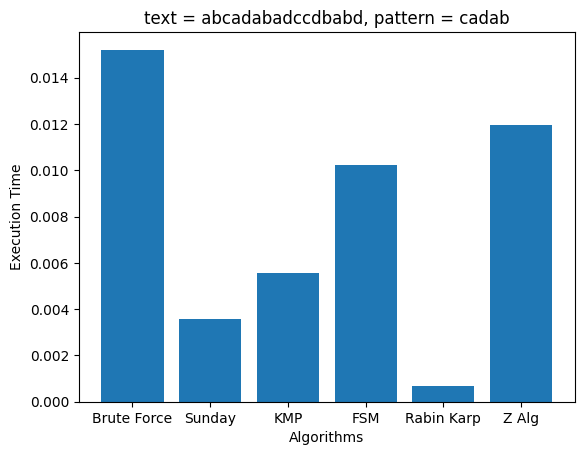

In [69]:
import matplotlib.pyplot as plt

print("Brute Force EX : ", Brute_elapsed_time)
print("Sunday EX : ", Sunday_elapsed_time)
print("KMP EX : ", Kmp_elapsed_time)
print("FSM EX : ", Fsm_elapsed_time)
print("Rabin Karp EX : ", Rabin_elapsed_time)
print("Z EX : ", Z_elapsed_time)

AlgNames = ["Brute Force","Sunday","KMP","FSM","Rabin Karp","Z Alg"]
Ex_Times = [Brute_elapsed_time,Sunday_elapsed_time,Kmp_elapsed_time,Fsm_elapsed_time,Rabin_elapsed_time,Z_elapsed_time]

plt.bar(AlgNames,Ex_Times)

plt.xlabel("Algorithms")
plt.ylabel("Execution Time")

plt.title("text = abcadabadccdbabd, pattern = cadab")

plt.show()
